<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>
# <r>Reciprocal</r> Function

### $$ f(x) = \frac{1}{x} $$


In [14]:
%matplotlib ipympl

# import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sympy.abc import x
from sympy import *
from IPython.display import Markdown as md

<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>
## <r>Define the function</r>

In [15]:
functionString = "1/x"  # edit the function here


# parse the function string into a sympy expression
f = parse_expr(functionString, evaluate=false) 
md("Original function: \n\
   ### $f(x) = {}$".format(latex(f)))

Original function: 
   ### $f(x) = 1 \cdot \frac{1}{x - 1}$

<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>
## <r>Define the Function Domain</r>
Define the start point, end point and the number of points to plot.<br>

- <r>startPoint</r> - the start point of the domain
- <r>endPoint</r> - the start point of the domain
- <r>step</r> - the difference between each point

In [16]:
startPoint = -10.0 # edit here to change the start point
endPoint = 10.0    # edit here to change the end point
step = 0.001       # edit resolution of the graph


# calculate the domain
domain = np.arange(startPoint, endPoint + step, step)
domain = np.array(domain, dtype=np.float64) # convert to float64
# display the domain
domain

array([-10.   ,  -9.999,  -9.998, ...,   9.998,   9.999,  10.   ])

### Simplify the function

In [17]:
# simplify the function
fs = simplify(f)
# lambdify the function
fl = lambdify(x, fs)
md("The simplified function is: \n\
  ### $f(x) = {}$".format(latex(fs)))

The simplified function is: 
  ### $f(x) = \frac{1}{x - 1}$

### Apply the function to the domain

In [18]:
fl_x = fl(domain)
print(fl_x)

[-0.09090909 -0.09091736 -0.09092562 ...  0.11113581  0.11112346
  0.11111111]


### Format the Cartesian Coordinate System



In [19]:
%%capture
fig, ax = plt.subplots()

ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('x', loc='right', color="red")

ax.set_ylabel('y', loc='top', rotation='horizontal', color="red")
ax.yaxis.set_ticks_position('left') 

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none') 

### Plot the function

In [20]:
ax.plot(domain, fl(domain)) 

## Find out the vertical asymptotes

### Calculate the roots of the denominator

In [21]:
# find out the denominator
denominator = fs.as_numer_denom()[1]
# find out the roots of the denominator ecuation
roots = solve(denominator, x)
md("The roots are is:\n\
  ### $x = {}$\n\
In these points are the vertical asymthotes".format(latex(roots)))

md("The denominator is:\n\
  ### $d(x) = {}$\n\
  calculate the solution for the ecuation:\n\
  ### $d(x)=0$\n\
  The roots are:\n\
  ### $x = {}$\n\
  ".format(latex(denominator), latex(roots)))

The denominator is:
  ### $d(x) = x - 1$
  calculate the solution for the ecuation:
  ### $d(x)=0$
  The roots are:
  ### $x = \left[ 1\right]$
  

### Plot the aympototes
Plot the asymptotes on the graph for the roots of the denominator which are real numbers.

In [22]:
for root in roots:
    # check if root is a real number
    if(not root.is_real):
        continue
    # clean under the aympototes
    ax.plot([root,root],[-10,10],color='white', linewidth=5)
    # plot the asymptotes
    ax.plot([root,root],[-10,10],color='red',linestyle='dashed', linewidth=1)

## Find out the horizontal asymptotes and plot them

FInd out the limit of the function as x approaches infinity. This is the horizontal asymptote.

In [23]:
l_plus_infinity = limit(fs, x, oo)
## check for the type of the limit
if(l_plus_infinity == oo or l_plus_infinity == -oo):
  pass
elif(l_plus_infinity == None):
  pass
elif(l_plus_infinity.is_number == False):
  # check if the limit is an AccumBounds - like sinus function
  pass
else:
  print("The limit is a finite number, so the horizontal asymptote is y = {}".format(l_plus_infinity))
  plt.plot([-10,+10],[l_plus_infinity,l_plus_infinity],color='red',linestyle='dashed', linewidth=1)
  
# try to find the limit of the function at negative infinity   
l_minus_infinity = limit(fs, x, -oo)
if(l_minus_infinity == oo or l_minus_infinity == -oo):
  pass
elif(l_minus_infinity == None):
  pass
elif(l_minus_infinity.is_number == False):
  # check if the limit is an AccumBounds - like sinus function
  pass
else:
  print("The limit is a finite number, so the horizontal asymptote is y = {}".format(l_minus_infinity))
  plt.plot([-10,+10],[l_minus_infinity,l_minus_infinity],color='red',linestyle='dashed', linewidth=1)

The limit is a finite number, so the horizontal asymptote is y = 0
The limit is a finite number, so the horizontal asymptote is y = 0


<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>
## <r>Zoom and Aspect Ratio</r>
Adjust the zoom and aspect ratio of the graph.

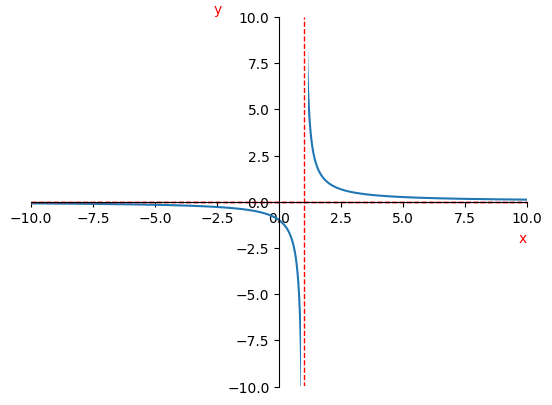

In [24]:
ax.set_xbound(-10,10)
ax.set_ybound(-10,10)

# show the plot
fig